In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from datetime import datetime
import numpy as np

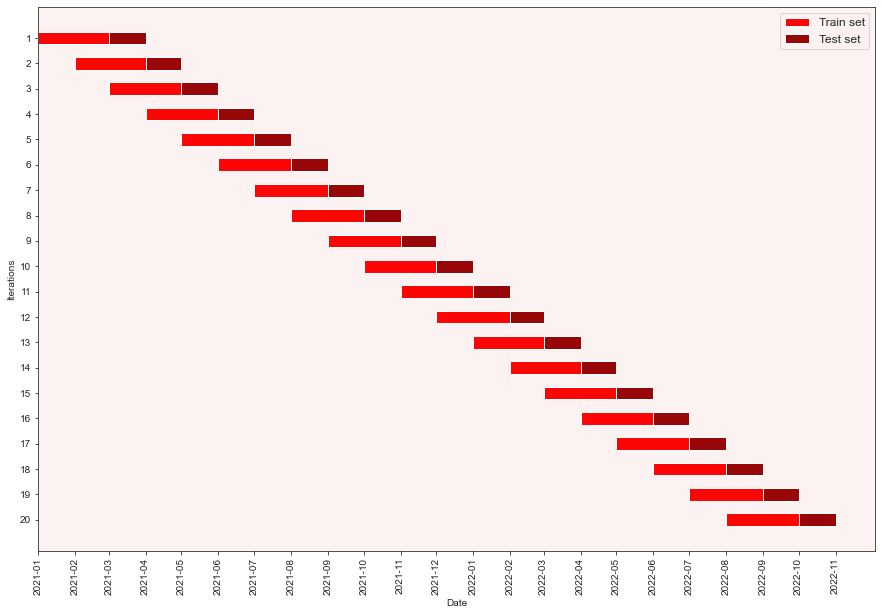

In [7]:
df_ML = pd.DataFrame({'fulldate': pd.date_range(start='2021-01-01', end='2022-11-30', freq='M')})
df_ML['fulldate'] = df_ML['fulldate'].dt.to_period('M')
timestamps = df_ML['fulldate'].sort_values().unique()
start_dates = []
start_dates_2 = []
end_dates = []
end_dates_2 = []
i = 0
ii = 1
max_timestamp = timestamps.max() - 2

while timestamps[i] < max_timestamp:
    start_dates.append(pd.to_datetime(timestamps[i].start_time))
    end_dates.append(pd.to_datetime((timestamps[i]+2).end_time))
    start_dates_2.append(pd.to_datetime((timestamps[i]+2).start_time))
    end_dates_2.append(pd.to_datetime((timestamps[i]+3).start_time))
    i += 1
    ii += 1

# print(start_dates)
# print(start_dates_2)
# print(end_dates)
# print(end_dates_2)
# # Create a DataFrame for the Gantt chart
df_gantt = pd.DataFrame({'Start': start_dates, 'End': end_dates, 'start_2': start_dates_2, 'end_2': end_dates_2})
df_gantt['Task'] = df_gantt.index + 1  # Assign task numbers
#df_gantt
# Plot the Gantt chart
sns.set_style("ticks", {"axes.facecolor": "#fcf2f2"})
fig, ax = plt.subplots(figsize=(15, 10))
#fig.set_facecolor('#FD0505')
bar1 = ax.barh(y=df_gantt['Task'], left=df_gantt['Start'], width=df_gantt['End'] - df_gantt['Start'], height=0.5, color='#FD0505', label='Train set')
bar2 = ax.barh(y=df_gantt['Task'], left=df_gantt['start_2'], width=df_gantt['end_2'] - df_gantt['start_2'], height=0.5, color='#970707', label='Test set')

# Format the chart
ax.set_xlabel('Date')
ax.set_ylabel('Iterations')
ax.set_yticks(df_gantt['Task'])
ax.set_yticklabels(df_gantt['Task'])
ax.invert_yaxis()

# Fix the dates in the x-axis
date_format = mdates.DateFormatter('%Y-%m')
ax.xaxis.set_major_formatter(date_format)
ax.xaxis.set_major_locator(mdates.MonthLocator())
plt.xticks(rotation=90)

# Remove the last tick
ax.set_xticks(ax.get_xticks()[:-1])

# Add a legend
legend = ax.legend(handles=[bar1, bar2], fontsize='large')

# Show the Gantt chart
plt.show()


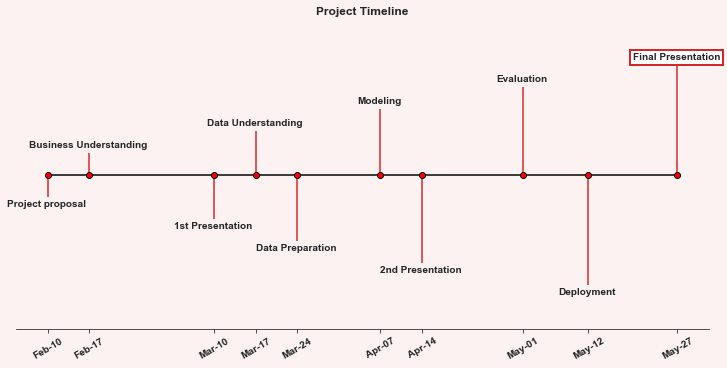

In [2]:
names = ['Project proposal', 'Business Understanding', '1st Presentation', 'Data Understanding', 'Data Preparation', 'Modeling',
        '2nd Presentation', 'Evaluation', 'Deployment', 'Final Presentation']

dates = ['2023-02-10', '2023-02-17', '2023-03-10', '2023-03-17','2023-03-24','2023-04-07', '2023-04-14',
         '2023-05-01', '2023-05-12', '2023-05-27']
dates = [datetime.strptime(d, "%Y-%m-%d") for d in dates]

levels = np.tile([-1,1,-2,2,-3,3,-4,4,-5,5], int(np.ceil(len(dates)/10)))[:len(dates)]
sns.set_style("ticks", {"axes.facecolor": "#fcf2f2"})
fig, ax = plt.subplots(figsize=(10, 5), constrained_layout=True)
ax.set_title("Project Timeline", fontweight="bold")

ax.vlines(dates, 0, levels, color="tab:red")
ax.plot(dates, np.zeros_like(dates), "-o", color="k", markerfacecolor="r")

# annotate lines
for d, l, r in zip(dates, levels, names):
    if r == 'Final Presentation':
        bbox_props = dict(boxstyle="square", fc="white", ec="tab:red", lw=2)
        ax.annotate(r, xy=(d, l),
                    xytext=(-1, np.sign(l)*3), textcoords="offset points",
                    bbox=bbox_props,
                    horizontalalignment="center",
                    verticalalignment="bottom" if l > 0 else "top",weight='bold')
    else:
        ax.annotate(r, xy=(d, l),
                    xytext=(-1, np.sign(l)*3), textcoords="offset points",
                    horizontalalignment="center",
                    verticalalignment="bottom" if l > 0 else "top",weight='bold')

# Set x-axis tick labels with month abbreviation and bold font
ax.set_xticks(dates)
xtick_labels = [date.strftime("%b-%d") for date in dates]
ax.set_xticklabels(xtick_labels, fontweight="bold")

# Set the facecolor of the figure's patch object
fig.patch.set_facecolor("#fcf2f2")

plt.setp(ax.get_xticklabels(), rotation=30, ha="center")
ax.yaxis.set_visible(False)
ax.spines[["left", "top", "right"]].set_visible(False)
ax.margins(y=0.2)
plt.show()